In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from typing import Union, Optional, Dict, Tuple, Any

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, accuracy_score

In [2]:
spaceship = pd.read_csv('../datasets/spaceship_titanic/train.csv').dropna(how='all')
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
spaceship.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 3.4 MB


In [4]:
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
spaceship[spaceship.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [6]:
spaceship[spaceship.isna().all(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [7]:
spaceship[spaceship.isna().any(axis=1)].to_csv('spaceship_titanic_nans.csv', index=False)

In [8]:
spaceship_one_nan = spaceship[spaceship.isna().sum(axis=1) == 1]
spaceship_one_nan

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,9247_01,Earth,True,G/1491/S,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,NaN,Phia Cleang,False
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [9]:
spaceship_one_nan.to_csv('spaceship_titanic_one_nan.csv', index=False)

In [10]:
spaceship_two_nans = spaceship[spaceship.isna().sum(axis=1) == 2]
spaceship_two_nans

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True
181,0202_02,Europa,False,A/2/P,55 Cancri e,NaN,False,0.0,2433.0,NaN,878.0,443.0,Vegas Embleng,True
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
251,0278_01,Earth,False,NaN,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,888.0,NaN,Judya Beachez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8623,9197_04,Europa,False,C/308/P,55 Cancri e,30.0,False,1569.0,NaN,0.0,NaN,2252.0,Phecca Platch,False
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True


In [11]:
spaceship_two_nans.to_csv('spaceship_titanic_two_nans.csv', index=False)

In [12]:
spaceship_three_nans = spaceship[spaceship.isna().sum(axis=1) == 3]
spaceship_three_nans

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1203,1284_01,Mars,True,F/247/S,NaN,NaN,False,0.0,NaN,0.0,0.0,0.0,Hal Knité,True
2639,2822_02,Earth,NaN,G/450/S,TRAPPIST-1e,5.0,NaN,0.0,0.0,0.0,0.0,NaN,Salley Harverez,False
2762,2970_01,Earth,False,NaN,TRAPPIST-1e,NaN,False,740.0,82.0,6.0,NaN,1.0,Dwin Adkinson,False
3072,3315_01,Earth,NaN,F/627/S,TRAPPIST-1e,15.0,False,10.0,0.0,99.0,NaN,2031.0,NaN,False
3535,3790_01,NaN,True,G/620/P,TRAPPIST-1e,13.0,False,0.0,NaN,0.0,NaN,0.0,Trick Meyersones,True
3882,4167_01,Earth,False,NaN,PSO J318.5-22,NaN,NaN,0.0,440.0,0.0,0.0,334.0,Ninaha Deckerson,False
4164,4446_05,Europa,NaN,B/175/S,TRAPPIST-1e,33.0,False,0.0,4017.0,NaN,NaN,2260.0,Phah Chocaters,True
4548,4840_01,NaN,True,F/915/S,TRAPPIST-1e,36.0,False,0.0,0.0,NaN,0.0,0.0,NaN,True
5208,5555_01,NaN,False,G/896/S,NaN,43.0,NaN,1.0,0.0,213.0,7.0,701.0,Winia Blanglison,True
5409,5777_01,Earth,NaN,F/1199/P,PSO J318.5-22,46.0,NaN,559.0,25.0,NaN,22.0,765.0,Katen River,False


In [13]:
spaceship_three_nans.to_csv('spaceship_titanic_three_nans.csv', index=False)

In [14]:
spaceship[spaceship.isna().sum(axis=1) >= 4]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [15]:
vip_passengers = spaceship[spaceship['VIP'] == True]
vip_passengers

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
108,0112_01,Europa,False,B/1/S,55 Cancri e,48.0,True,0.0,2537.0,87.0,17.0,13.0,Moth Cowtale,True
120,0128_01,Mars,False,D/3/S,TRAPPIST-1e,61.0,True,2353.0,334.0,9.0,316.0,2.0,Grohs Fles,False
214,0224_01,Mars,False,F/42/S,TRAPPIST-1e,32.0,True,181.0,0.0,5.0,1634.0,0.0,Blues Queen,False
291,0321_01,NaN,False,F/61/S,TRAPPIST-1e,59.0,True,1018.0,0.0,209.0,0.0,0.0,Quites Bache,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8579,9158_01,Europa,True,B/298/P,55 Cancri e,30.0,True,0.0,0.0,0.0,0.0,0.0,Magnon Maglible,True
8614,9194_02,Europa,False,E/603/S,TRAPPIST-1e,32.0,True,1003.0,909.0,0.0,0.0,15.0,Tachba Subwor,False
8621,9197_02,Europa,False,C/308/P,NaN,41.0,True,0.0,7964.0,0.0,3238.0,5839.0,Aludram Platch,False
8652,9230_01,Europa,False,C/342/S,TRAPPIST-1e,36.0,True,0.0,5600.0,715.0,2868.0,971.0,NaN,True


In [16]:
bill_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [17]:
vip_total_bill = vip_passengers[bill_cols].sum(axis=1)
vip_total_bill

2       10383.0
108      2654.0
120      3014.0
214      1820.0
291      1227.0
         ...   
8579        0.0
8614     1927.0
8621    17041.0
8652    10154.0
8688     8536.0
Length: 199, dtype: float64

In [18]:
vip_total_bill.median()

np.float64(2767.0)

In [19]:
vip_total_bill.describe()

count      199.000000
mean      4425.477387
std       5121.300417
min          0.000000
25%       1281.000000
50%       2767.000000
75%       6120.500000
max      31076.000000
dtype: float64

In [20]:
regular_passengers = spaceship[spaceship['VIP'] == False]
regular_passengers

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [21]:
regular_total_bill = regular_passengers[bill_cols].sum(axis=1)
regular_total_bill

0          0.0
1        736.0
3       5176.0
4       1091.0
5        774.0
         ...  
8687    3540.0
8689       0.0
8690    1873.0
8691    4637.0
8692    4826.0
Length: 8291, dtype: float64

In [22]:
regular_total_bill.median()

np.float64(705.0)

In [23]:
regular_total_bill.describe()

count     8291.000000
mean      1371.504644
std       2683.701966
min          0.000000
25%          0.000000
50%        705.000000
75%       1369.000000
max      35987.000000
dtype: float64

In [24]:
nan_vip_passengers = spaceship[spaceship['VIP'].isna()]
nan_vip_passengers

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,NaN,0.0,492.0,48.0,20.0,401.0,Marina Leodger,False
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,True
145,0165_01,Mars,True,F/37/P,TRAPPIST-1e,35.0,NaN,0.0,0.0,0.0,0.0,0.0,Graven Anche,True
228,0244_02,Mars,True,F/47/S,55 Cancri e,14.0,NaN,0.0,0.0,0.0,0.0,0.0,Tous Sad,True
566,0593_01,Mars,False,D/24/P,TRAPPIST-1e,NaN,NaN,43.0,152.0,182.0,1.0,2005.0,Hon Kra,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,9074_01,Earth,True,G/1460/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,NaN,0.0,0.0,Adamie Trerady,True
8512,9081_06,Earth,False,F/1858/P,PSO J318.5-22,16.0,NaN,0.0,0.0,761.0,0.0,0.0,Daryla Clemondsey,False
8542,9122_01,Earth,True,G/1469/S,55 Cancri e,55.0,NaN,0.0,0.0,0.0,0.0,0.0,Paulas Schmondez,False
8630,9205_03,Europa,True,B/300/P,TRAPPIST-1e,52.0,NaN,0.0,0.0,0.0,0.0,0.0,Propent Brakeng,True


In [25]:
spaceship['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [26]:
spaceship['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [27]:
spaceship['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [28]:
spaceship['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [29]:
spaceship['Age'].median()

np.float64(27.0)

In [30]:
def check_distribution(data: Union[pd.DataFrame, pd.Series], column_name: Optional[str] = None):
    if isinstance(data, pd.DataFrame):
        if column_name is None:
            raise ValueError("column_name must be provided when passing a DataFrame.")
        series = data[column_name]
        display_name = column_name
    else:
        series = data
        display_name = column_name if column_name else (series.name if series.name else "Data")

    mean_val = series.mean()
    median_val = series.median()
    skewness = series.skew()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(series, kde=True, color='skyblue', bins=30)
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    
    plt.title(f'Distribution Analysis: {display_name}')
    plt.legend()
    plt.show()
    
    print(f"Analysis for: {display_name}")
    print(f"Skewness: {skewness:.2f}")
    
    if abs(skewness) > 0.5:
        print("RECOMMENDATION: Use MEDIAN.")
        print("Reason: The distribution is skewed or contains outliers; median is more robust.")
    else:
        print("RECOMMENDATION: Use MEAN.")
        print("Reason: The distribution is approximately symmetric (normal).")

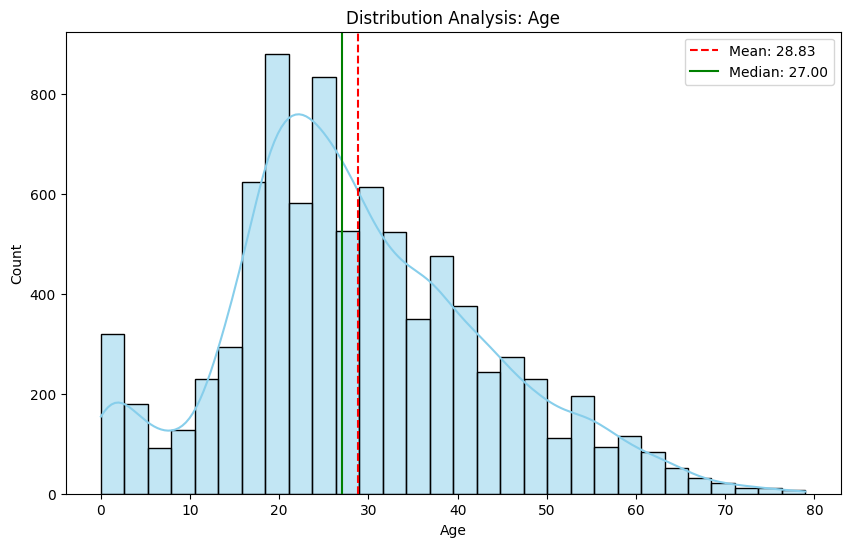

Analysis for: Age
Skewness: 0.42
RECOMMENDATION: Use MEAN.
Reason: The distribution is approximately symmetric (normal).


In [31]:
check_distribution(spaceship, 'Age')

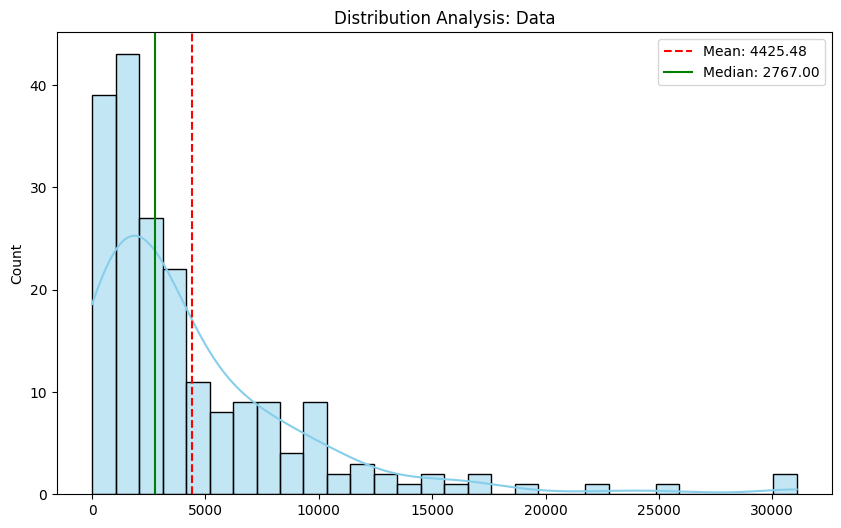

Analysis for: Data
Skewness: 2.49
RECOMMENDATION: Use MEDIAN.
Reason: The distribution is skewed or contains outliers; median is more robust.


In [32]:
check_distribution(vip_total_bill)

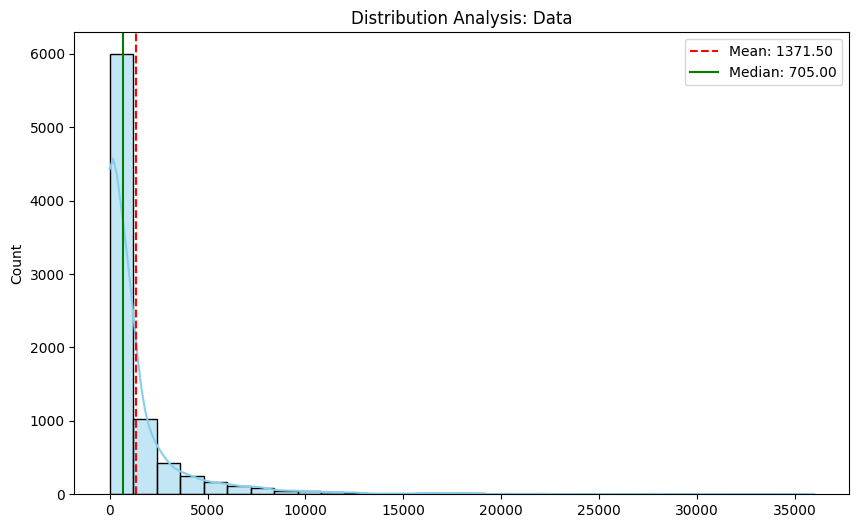

Analysis for: Data
Skewness: 4.52
RECOMMENDATION: Use MEDIAN.
Reason: The distribution is skewed or contains outliers; median is more robust.


In [33]:
check_distribution(regular_total_bill)

In [34]:
pd.set_option('future.no_silent_downcasting', True)

In [35]:
def fill_na_logic(series: pd.Series, global_val: Any) -> Any:
    if series.notna().any():
        available = series.dropna().tolist()
        if len(available) > 0:
            mode_vals = series.mode()
            if not mode_vals.empty:
                return mode_vals[0]
            return random.choice(available)
    return global_val

In [36]:
def preprocess(
    data: pd.DataFrame, 
    age_mode: str = 'median', 
    vip_mode: str = 'median'
) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    
    data = data.copy()
    data_info: Dict[str, Any] = {}

    data['Group'] = data['PassengerId'].str.split('_').str[0]
    data['GroupSize'] = data.groupby('Group')['Group'].transform('count').astype(np.int16)
    data['CabinSide'] = data['Cabin'].str.split('/').str[-1]

    bill_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    data[bill_cols] = data[bill_cols].fillna(0).astype('int32')
    data['TotalBill'] = data[bill_cols].sum(axis=1).astype('int32')
    
    data_info['home_planet'] = data['HomePlanet'].mode()[0]
    data_info['cryo_sleep'] = data['CryoSleep'].mode()[0]
    data_info['destination'] = data['Destination'].mode()[0]
    data_info['cabin_side'] = data['CabinSide'].mode()[0]
    data_info['age'] = data['Age'].median() if age_mode == 'median' else data['Age'].mean()
    
    data_info['bill_cols'] = bill_cols
    data_info['age_mode'] = age_mode
    data_info['vip_mode'] = vip_mode
    
    vip_median = data[data['VIP'] == True]['TotalBill'].median()
    vip_mean = data[data['VIP'] == True]['TotalBill'].mean()
    data_info['vip_threshold'] = vip_median if vip_mode == 'median' else vip_mean
    
    cols_to_fill = {
        'HomePlanet': data_info['home_planet'],
        'CryoSleep': data_info['cryo_sleep'],
        'Destination': data_info['destination'],
        'CabinSide': data_info['cabin_side'],
        'Age': data_info['age']
    }
    
    data_info['cols_to_fill'] = cols_to_fill
    
    for col, global_val in cols_to_fill.items():
        group_filled = data.groupby('Group')[col].transform(lambda x: fill_na_logic(x, global_val))
        data[col] = data[col].fillna(group_filled).infer_objects(copy=False)
    
    vip_mask = data['VIP'].isna()
    new_vip_values = (data.loc[vip_mask, 'TotalBill'] > data_info['vip_threshold']).astype(bool)
    data.loc[vip_mask, 'VIP'] = new_vip_values
    
    data['VIP'] = data['VIP'].astype('int8')
    data['CryoSleep'] = data['CryoSleep'].astype('int8')
    data['Age'] = data['Age'].astype('int16')
    
    data = pd.get_dummies(data, columns=['HomePlanet', 'Destination', 'CabinSide'], dtype='int8')

    drop_cols = ['Name', 'PassengerId', 'Cabin', 'Group'] + bill_cols
    data.drop(drop_cols, axis=1, inplace=True)

    home_planet_cols = sorted([c for c in data.columns if c.startswith('HomePlanet_')])
    cabin_side_cols = sorted([c for c in data.columns if c.startswith('CabinSide_')])
    destination_cols = sorted([c for c in data.columns if c.startswith('Destination_')])
    
    columns_order = (
        ['GroupSize'] + 
        home_planet_cols + 
        ['CryoSleep'] + 
        cabin_side_cols + 
        destination_cols + 
        ['Age', 'VIP', 'TotalBill']
    )
    
    data = data.reindex(columns=columns_order, fill_value=0)

    ohe_cols = [c for c in data.columns if '_' in c or c in ['VIP', 'CryoSleep']]
    data[ohe_cols] = data[ohe_cols].astype('int8')
    
    data_info["data_columns"] = list(data.columns)
    
    return data, data_info

In [37]:
y = spaceship['Transported'].astype('int8')
x = spaceship.drop('Transported', axis=1)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6519, 13), (2174, 13), (6519,), (2174,))

In [40]:
x_train_p, data_info = preprocess(x_train)

In [41]:
x_train_p

,GroupSize,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep,CabinSide_P,CabinSide_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Age,VIP,TotalBill
5020,1,0,0,1,1,1,0,0,0,1,37,0,0
5967,3,1,0,0,0,0,1,1,0,0,44,0,0
991,1,1,0,0,0,0,1,0,1,0,27,0,558
2894,1,1,0,0,0,1,0,1,0,0,15,0,4181
2228,1,0,0,1,0,0,1,0,0,1,23,0,1854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,1,0,1,0,1,1,0,1,0,0,32,0,0
7891,1,1,0,0,0,0,1,0,0,1,22,0,739
4859,1,0,0,1,0,0,1,0,0,1,29,0,1359
3264,2,1,0,0,0,1,0,0,0,1,0,0,0


In [42]:
data_info

{'home_planet': 'Earth',
 'cryo_sleep': False,
 'destination': 'TRAPPIST-1e',
 'cabin_side': 'S',
 'age': np.float64(27.0),
 'bill_cols': ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
 'age_mode': 'median',
 'vip_mode': 'median',
 'vip_threshold': np.float64(2776.5),
 'cols_to_fill': {'HomePlanet': 'Earth',
  'CryoSleep': False,
  'Destination': 'TRAPPIST-1e',
  'CabinSide': 'S',
  'Age': np.float64(27.0)},
 'data_columns': ['GroupSize',
  'HomePlanet_Earth',
  'HomePlanet_Europa',
  'HomePlanet_Mars',
  'CryoSleep',
  'CabinSide_P',
  'CabinSide_S',
  'Destination_55 Cancri e',
  'Destination_PSO J318.5-22',
  'Destination_TRAPPIST-1e',
  'Age',
  'VIP',
  'TotalBill']}

In [43]:
def preprocess_test(data: pd.DataFrame, data_info: Dict[str, Any]) -> pd.DataFrame:
    data = data.copy()
    
    data['Group'] = data['PassengerId'].str.split('_').str[0]
    data['GroupSize'] = data.groupby('Group')['Group'].transform('count').astype('int16')
    data['CabinSide'] = data['Cabin'].str.split('/').str[-1]

    bill_cols = data_info['bill_cols']
    data[bill_cols] = data[bill_cols].fillna(0).astype('int32')
    data['TotalBill'] = data[bill_cols].sum(axis=1).astype('int32')
    
    cols_to_fill = data_info['cols_to_fill']
    for col, global_val in cols_to_fill.items():
        group_filled = data.groupby('Group')[col].transform(lambda x: fill_na_logic(x, global_val))
        data[col] = data[col].fillna(group_filled).infer_objects(copy=False)
    
    vip_mask = data['VIP'].isna()
    new_vip_values = (data.loc[vip_mask, 'TotalBill'] > data_info['vip_threshold']).astype(bool)
    data.loc[vip_mask, 'VIP'] = new_vip_values
    
    data['VIP'] = data['VIP'].astype('int8')
    data['CryoSleep'] = data['CryoSleep'].astype('int8')
    data['Age'] = data['Age'].astype('int16')
    
    data = pd.get_dummies(data, columns=['HomePlanet', 'Destination', 'CabinSide'], dtype='int8')

    drop_cols = ['Name', 'PassengerId', 'Cabin', 'Group'] + bill_cols
    existing_drop = [c for c in drop_cols if c in data.columns]
    data.drop(columns=existing_drop, inplace=True)

    data = data.reindex(columns=data_info["data_columns"], fill_value=0)
    
    ohe_cols = [c for c in data.columns if '_' in c or c in ['VIP', 'CryoSleep']]
    data[ohe_cols] = data[ohe_cols].astype('int8')
    
    return data

In [44]:
x_test_p = preprocess_test(x_test, data_info)

In [45]:
x_test_p

,GroupSize,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep,CabinSide_P,CabinSide_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Age,VIP,TotalBill
3601,2,1,0,0,0,0,1,1,0,0,16,0,872
6057,2,1,0,0,0,0,1,1,0,0,2,0,0
2797,1,1,0,0,0,0,1,0,0,1,31,0,883
7110,1,1,0,0,0,1,0,1,0,0,14,0,657
8579,1,0,1,0,1,1,0,1,0,0,30,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,1,1,0,0,0,0,1,0,0,1,26,0,1156
4160,2,0,1,0,0,0,1,0,0,1,38,0,4429
6477,1,0,0,1,1,1,0,0,0,1,33,0,0
3641,1,1,0,0,1,0,1,0,0,1,33,0,0


In [46]:
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False), 
    StandardScaler(), 
    LogisticRegression(max_iter=1000) 
)

pipeline.fit(x_train_p, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [47]:
def show_classification_report(y_true, y_pred):
    print("        [ CLASSIFICATION REPORT ]")
    print(classification_report(y_true, y_pred))
    print(f"Overall Accuracy: {accuracy_score(y_true, y_pred):.4f}")

In [48]:
def classification_plots(model, x_test, y_test):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    ax = plt.subplot(1, 2, 2)
    RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax)
    plt.title('ROC-AUC Curve')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [49]:
y_predicted_train = pipeline.predict(x_train_p)
y_predicted_train

array([1, 0, 0, ..., 0, 0, 0], shape=(6519,), dtype=int8)

In [50]:
np.array(y_train)

array([1, 1, 0, ..., 0, 0, 0], shape=(6519,), dtype=int8)

In [51]:
show_classification_report(y_train, y_predicted_train)

        [ CLASSIFICATION REPORT ]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76      3238
           1       0.80      0.64      0.71      3281

    accuracy                           0.74      6519
   macro avg       0.75      0.74      0.74      6519
weighted avg       0.75      0.74      0.74      6519

Overall Accuracy: 0.7385


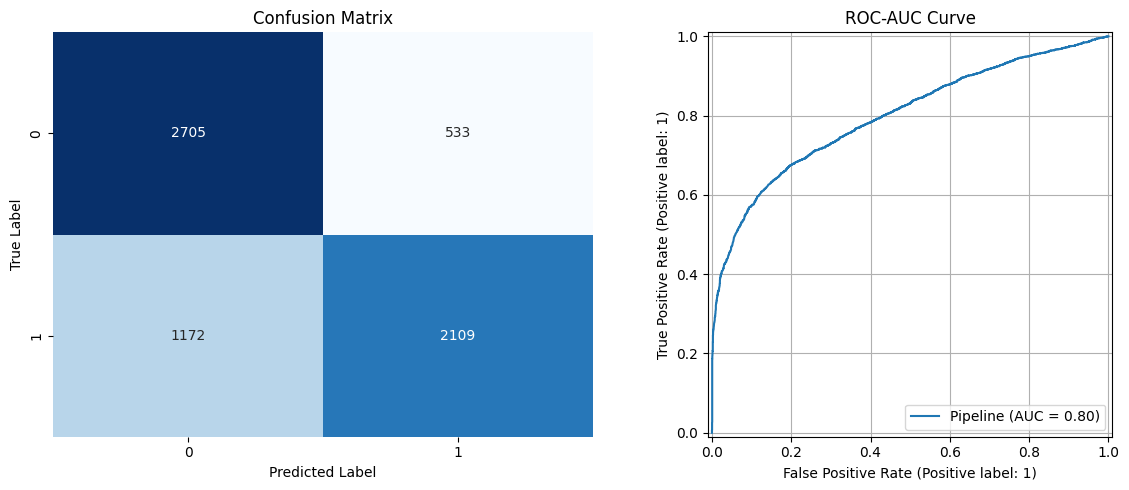

In [52]:
classification_plots(pipeline, x_train_p, y_train)

In [53]:
y_predicted = pipeline.predict(x_test_p)
y_predicted

array([0, 1, 0, ..., 1, 1, 1], shape=(2174,), dtype=int8)

In [54]:
np.array(y_test)

array([1, 1, 0, ..., 1, 1, 1], shape=(2174,), dtype=int8)

In [55]:
show_classification_report(y_test, y_predicted)

        [ CLASSIFICATION REPORT ]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1077
           1       0.80      0.65      0.72      1097

    accuracy                           0.74      2174
   macro avg       0.75      0.74      0.74      2174
weighted avg       0.75      0.74      0.74      2174

Overall Accuracy: 0.7420


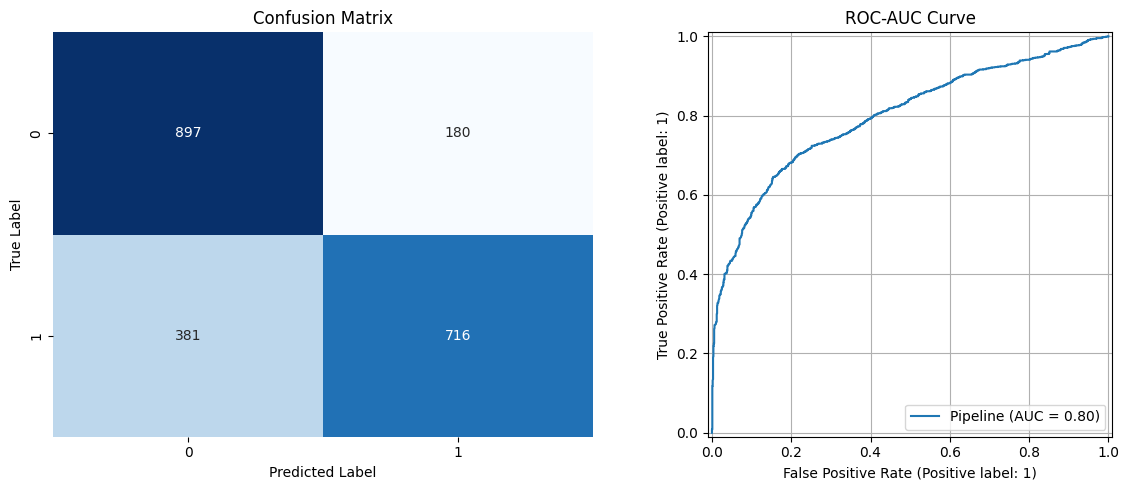

In [56]:
classification_plots(pipeline, x_test_p, y_test)

In [57]:
knn_pipeline = make_pipeline(
    StandardScaler(), 
    KNeighborsClassifier(n_neighbors=5)
)

knn_pipeline.fit(x_train_p, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('kneighborsclassifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thena

In [63]:
y_knn_predicted_train = knn_pipeline.predict(x_train_p)
y_knn_predicted_train

array([1, 1, 0, ..., 0, 1, 0], shape=(6519,), dtype=int8)

In [64]:
np.array(y_train)

array([1, 1, 0, ..., 0, 0, 0], shape=(6519,), dtype=int8)

In [65]:
accuracy_score(y_train, y_knn_predicted_train)

0.7820217824819757

In [66]:
show_classification_report(y_train, y_knn_predicted_train)

        [ CLASSIFICATION REPORT ]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      3238
           1       0.82      0.73      0.77      3281

    accuracy                           0.78      6519
   macro avg       0.79      0.78      0.78      6519
weighted avg       0.79      0.78      0.78      6519

Overall Accuracy: 0.7820


In [67]:
y_knn_predicted = knn_pipeline.predict(x_test_p)
y_knn_predicted

array([1, 1, 0, ..., 1, 1, 0], shape=(2174,), dtype=int8)

In [68]:
np.array(y_test)

array([1, 1, 0, ..., 1, 1, 1], shape=(2174,), dtype=int8)

In [69]:
accuracy_score(y_test, y_knn_predicted)

0.7060717571297148

In [70]:
show_classification_report(y_test, y_knn_predicted)

        [ CLASSIFICATION REPORT ]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1077
           1       0.72      0.67      0.70      1097

    accuracy                           0.71      2174
   macro avg       0.71      0.71      0.71      2174
weighted avg       0.71      0.71      0.71      2174

Overall Accuracy: 0.7061


In [71]:
poly_knn_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False), 
    StandardScaler(), 
    KNeighborsClassifier(n_neighbors=17)
)

poly_knn_pipeline.fit(x_train_p, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [72]:
y_predicted_train = poly_knn_pipeline.predict(x_train_p)
y_predicted_train

array([1, 0, 0, ..., 0, 0, 0], shape=(6519,), dtype=int8)

In [73]:
np.array(y_train)

array([1, 1, 0, ..., 0, 0, 0], shape=(6519,), dtype=int8)

In [75]:
show_classification_report(y_train, y_predicted_train)

        [ CLASSIFICATION REPORT ]
              precision    recall  f1-score   support

           0       0.71      0.84      0.77      3238
           1       0.80      0.66      0.72      3281

    accuracy                           0.75      6519
   macro avg       0.75      0.75      0.74      6519
weighted avg       0.76      0.75      0.74      6519

Overall Accuracy: 0.7461


In [76]:
y_predicted = poly_knn_pipeline.predict(x_test_p)
y_predicted

array([0, 1, 0, ..., 1, 1, 0], shape=(2174,), dtype=int8)

In [77]:
np.array(y_test)

array([1, 1, 0, ..., 1, 1, 1], shape=(2174,), dtype=int8)

In [79]:
show_classification_report(y_test, y_predicted)

        [ CLASSIFICATION REPORT ]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1077
           1       0.78      0.64      0.70      1097

    accuracy                           0.73      2174
   macro avg       0.74      0.73      0.73      2174
weighted avg       0.74      0.73      0.73      2174

Overall Accuracy: 0.7272


In [128]:
rf_pipeline = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(n_estimators=100, random_state=42)
)

rf_pipeline.fit(x_train_p, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('randomforestclassifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2


In [129]:
y_rf_predicted_train = rf_pipeline.predict(x_train_p)
y_rf_predicted_train

array([0, 1, 0, ..., 0, 1, 0], shape=(6519,), dtype=int8)

In [130]:
show_classification_report(y_train, y_rf_predicted_train)

        [ CLASSIFICATION REPORT ]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      3238
           1       0.94      0.97      0.96      3281

    accuracy                           0.96      6519
   macro avg       0.96      0.96      0.96      6519
weighted avg       0.96      0.96      0.96      6519

Overall Accuracy: 0.9566


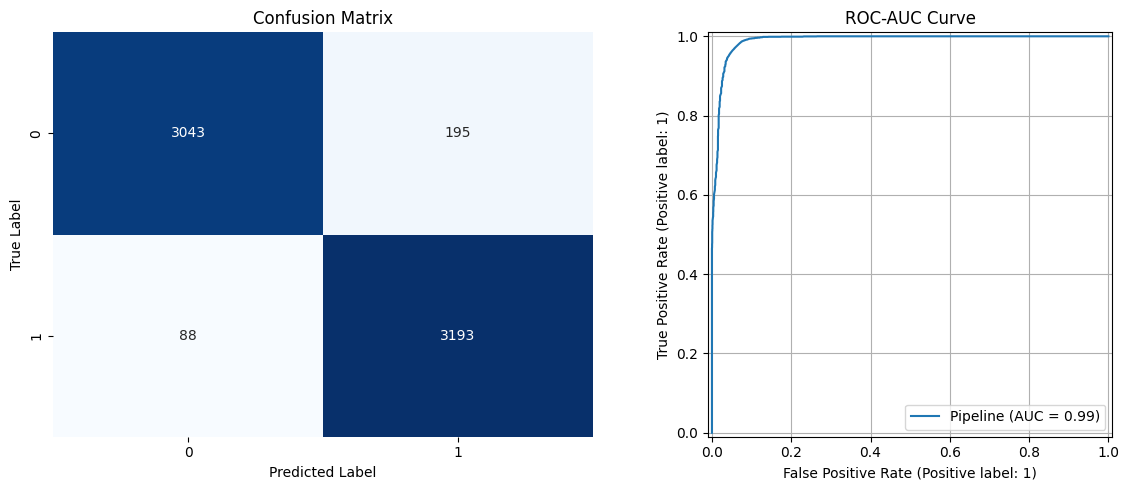

In [131]:
classification_plots(rf_pipeline, x_train_p, y_train)

In [132]:
y_rf_predicted = rf_pipeline.predict(x_test_p)
y_rf_predicted

array([1, 1, 1, ..., 1, 0, 1], shape=(2174,), dtype=int8)

In [133]:
show_classification_report(y_test, y_rf_predicted)

        [ CLASSIFICATION REPORT ]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      1077
           1       0.69      0.68      0.69      1097

    accuracy                           0.69      2174
   macro avg       0.69      0.69      0.69      2174
weighted avg       0.69      0.69      0.69      2174

Overall Accuracy: 0.6854


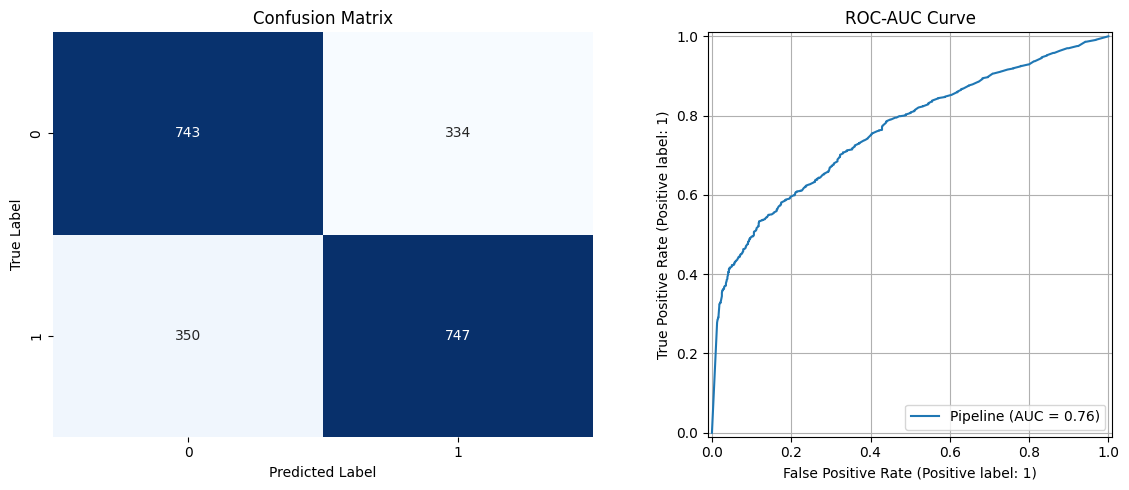

In [134]:
classification_plots(rf_pipeline, x_test_p, y_test)

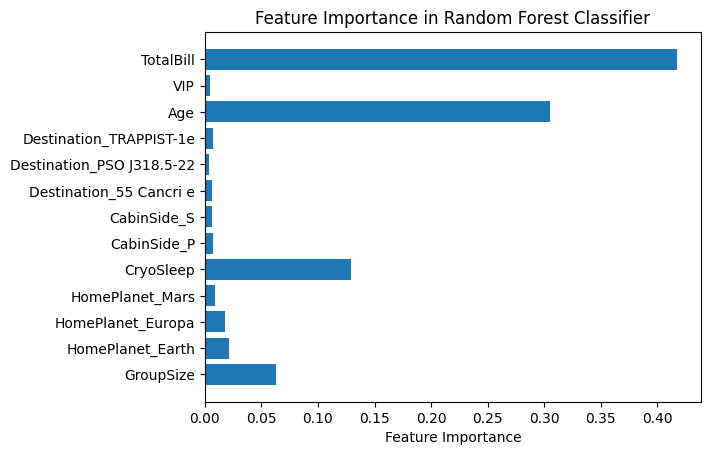

In [110]:
rf_model = rf_pipeline[-1]
feature_importances = rf_model.feature_importances_

plt.barh(x_test_p.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

In [101]:
xgb_pipeline = make_pipeline(
    StandardScaler(), 
    XGBClassifier()
)

xgb_pipeline.fit(x_train_p, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('standardscaler', ...), ('xgbclassifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None


In [102]:
y_xgb_predicted_train = xgb_pipeline.predict(x_train_p)
y_xgb_predicted_train

array([1, 1, 0, ..., 0, 1, 0], shape=(6519,))

In [103]:
show_classification_report(y_train, y_xgb_predicted_train)

        [ CLASSIFICATION REPORT ]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3238
           1       0.87      0.81      0.84      3281

    accuracy                           0.84      6519
   macro avg       0.84      0.84      0.84      6519
weighted avg       0.84      0.84      0.84      6519

Overall Accuracy: 0.8409


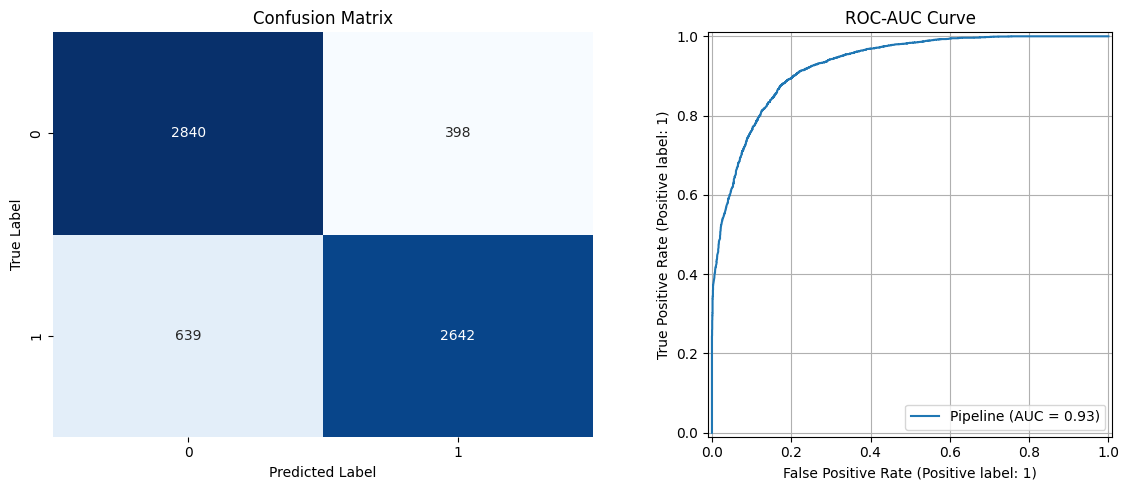

In [104]:
classification_plots(xgb_pipeline, x_train_p, y_train)

In [105]:
y_xgb_predicted = xgb_pipeline.predict(x_test_p)
y_xgb_predicted

array([0, 1, 0, ..., 1, 1, 1], shape=(2174,))

In [107]:
show_classification_report(y_test, y_xgb_predicted)

        [ CLASSIFICATION REPORT ]
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1077
           1       0.74      0.68      0.71      1097

    accuracy                           0.71      2174
   macro avg       0.72      0.72      0.71      2174
weighted avg       0.72      0.71      0.71      2174

Overall Accuracy: 0.7148


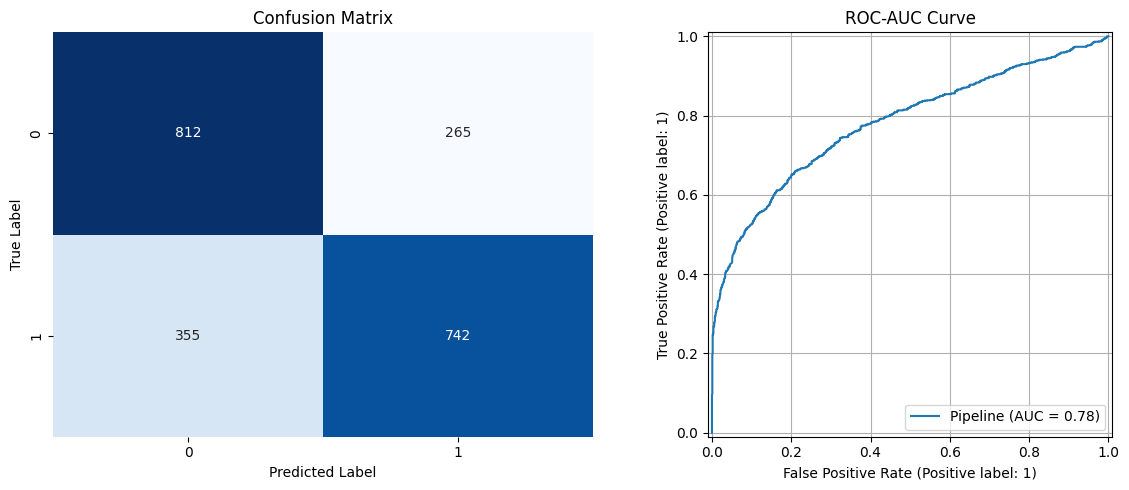

In [106]:
classification_plots(xgb_pipeline, x_test_p, y_test)